# 1. Training with full labeled

In [5]:
!python3 test_SRC_MT.py --gpu 0,1,2 --resume ../model/fully/checkpoint/epoch_100.pth

Namespace(root_path='../../', csv_file_train='../data/sipakmed_train.csv', csv_file_val='../data/sipakmed_val.csv', csv_file_test='../data/sipakmed_test.csv', exp='test', epochs=1000, batch_size=16, labeled_bs=4, drop_rate=0.2, ema_consistency=1, labeled_num=100, base_lr=0.0001, deterministic=1, seed=1337, gpu='0,1,2', resume='../model/fully/checkpoint/epoch_100.pth', start_epoch=0, global_step=0, label_uncertainty='U-Ones', consistency_relation_weight=1, ema_decay=0.99, consistency_type='mse', consistency=1, consistency_rampup=30)
=> loading checkpoint '../model/fully/checkpoint/epoch_100.pth'
/home/nhom2a/lehieu/Semi-Classification_SRC_Group2a/code/test_SRC_MT.py:121: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-m

# 2. Training with semi unlabeled

In [4]:
!python3 test_SRC_MT.py --gpu 0,1,2 --resume ../model/semi/checkpoint/epoch_100.pth

Namespace(root_path='../../', csv_file_train='../data/sipakmed_train.csv', csv_file_val='../data/sipakmed_val.csv', csv_file_test='../data/sipakmed_test.csv', exp='test', epochs=1000, batch_size=16, labeled_bs=4, drop_rate=0.2, ema_consistency=1, labeled_num=100, base_lr=0.0001, deterministic=1, seed=1337, gpu='0,1,2', resume='../model/semi/checkpoint/epoch_100.pth', start_epoch=0, global_step=0, label_uncertainty='U-Ones', consistency_relation_weight=1, ema_decay=0.99, consistency_type='mse', consistency=1, consistency_rampup=30)
=> loading checkpoint '../model/semi/checkpoint/epoch_100.pth'
/home/nhom2a/lehieu/Semi-Classification_SRC_Group2a/code/test_SRC_MT.py:121: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-mod

2024-11-04 07:58:00.649379: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-04 07:58:01.937723: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 07:58:02.335334: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-04 07:58:02.451239: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-04 07:58:03.416471: I tensorflow/core/platform/cpu_feature_guar

Available scalars:
lr
loss/loss
loss/loss_classification
train/consistency_loss
train/consistency_weight
train/consistency_dist


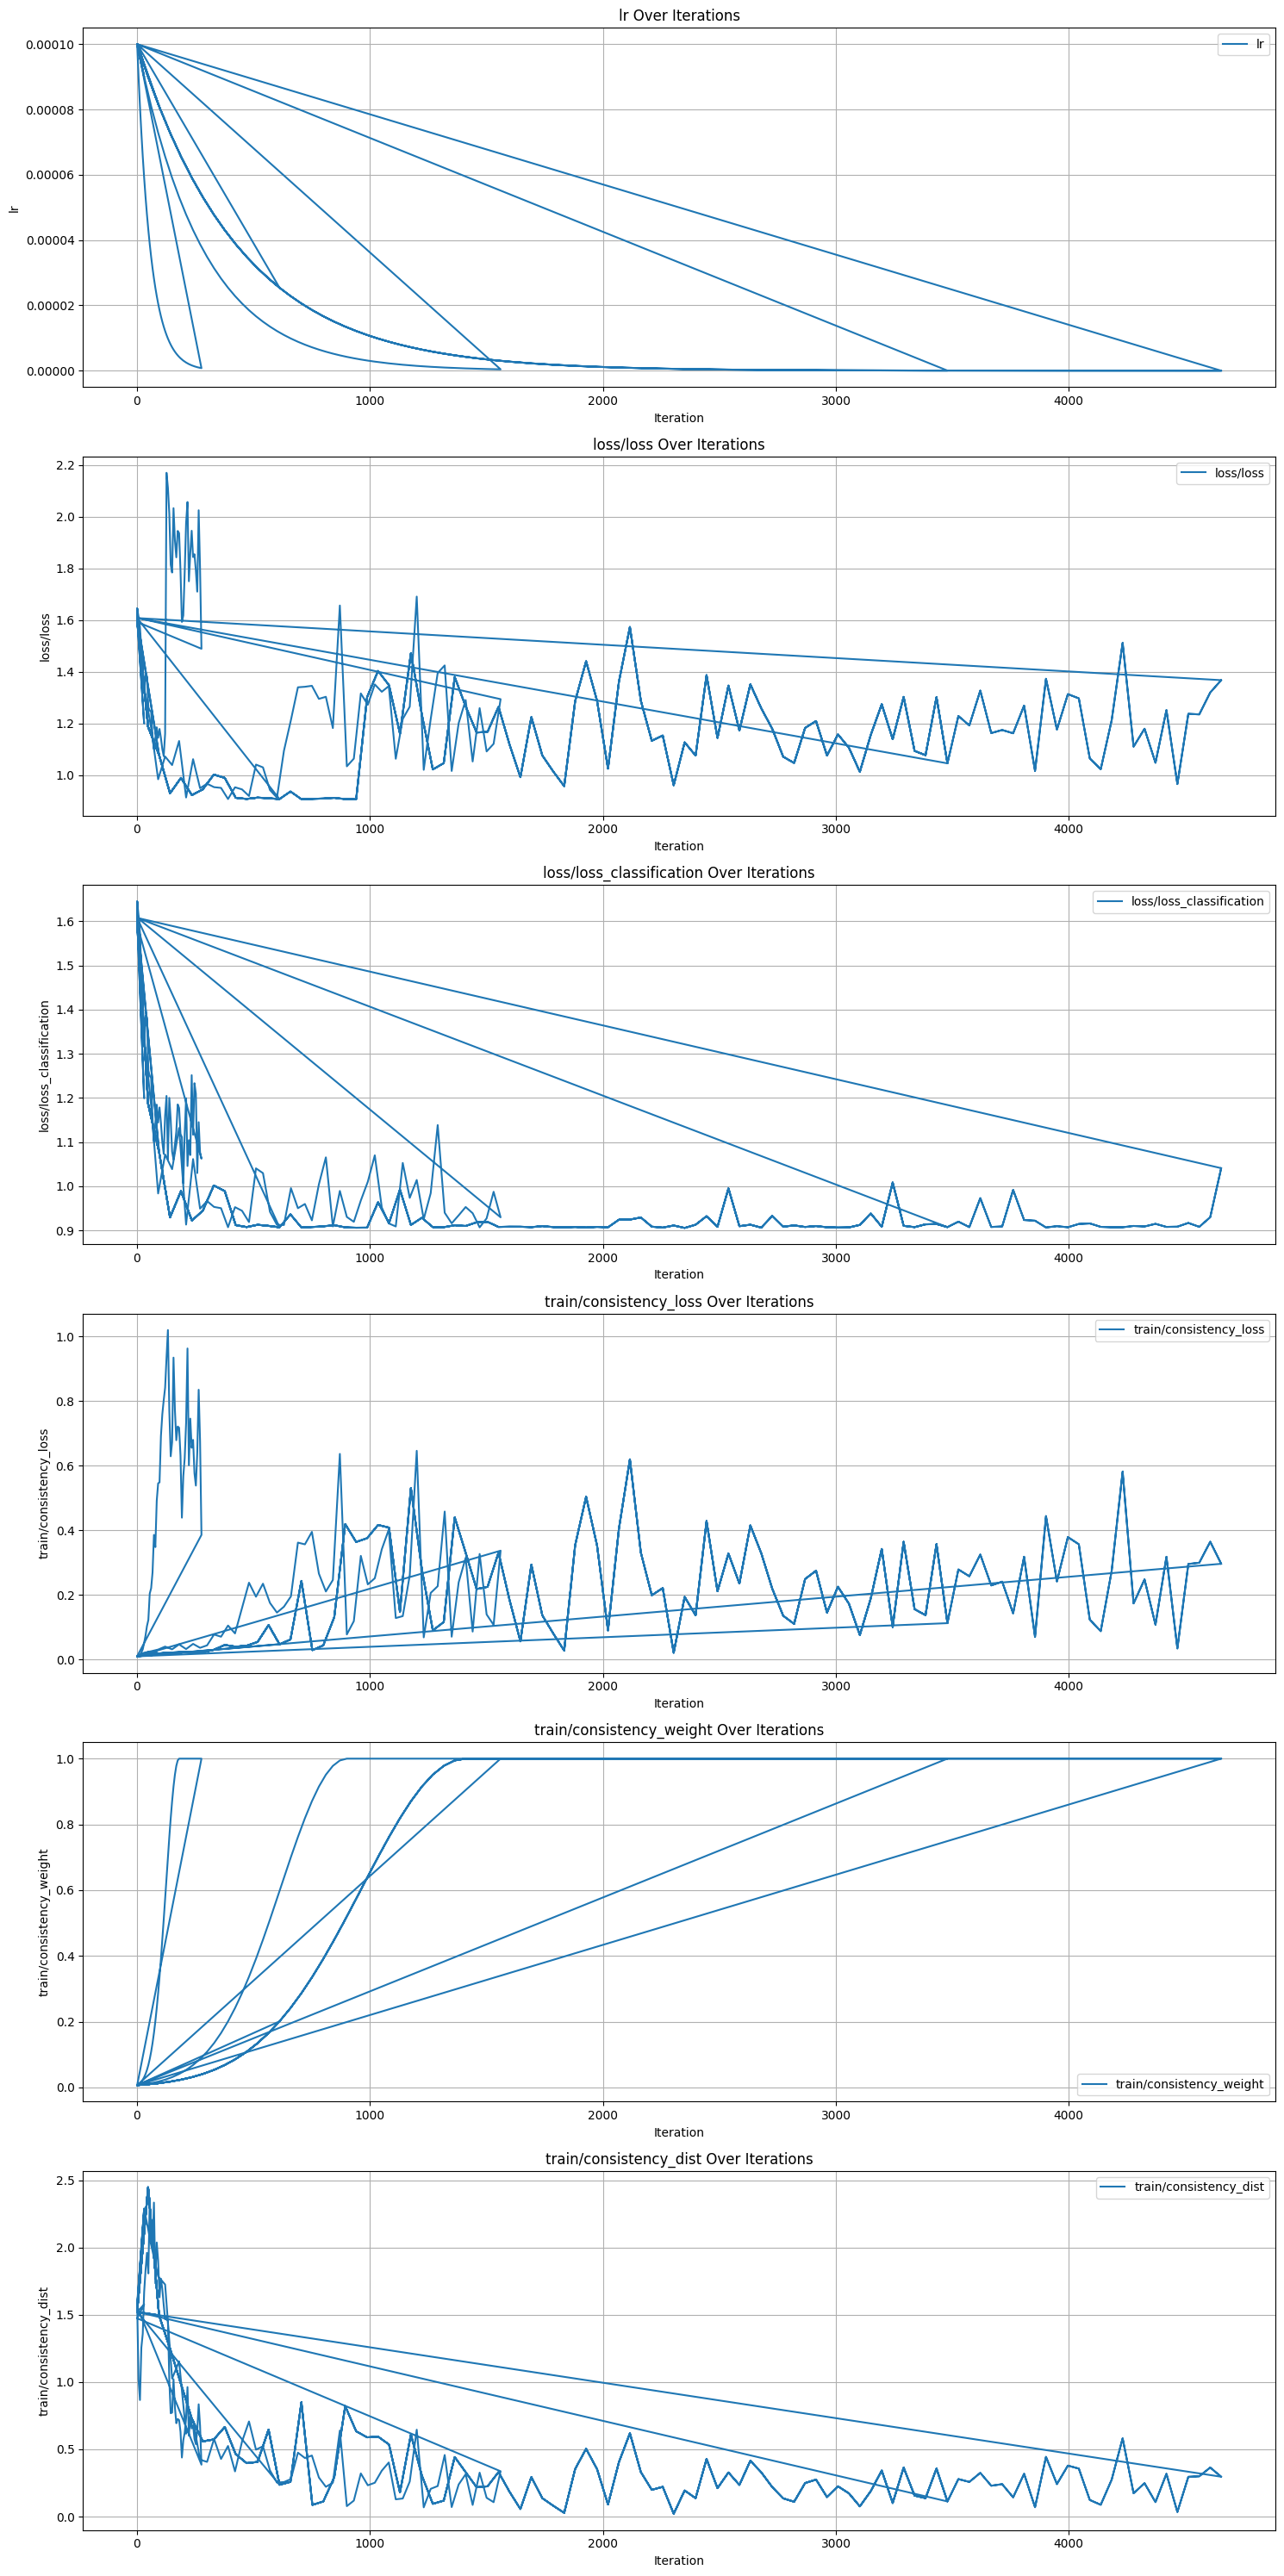

In [6]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import os

def list_scalars(logdir):
    event_acc = EventAccumulator(logdir)
    event_acc.Reload()
    tags = event_acc.Tags()
    return tags.get('scalars', [])

def extract_scalar_data(logdir, scalar_name):
    event_acc = EventAccumulator(logdir)
    event_acc.Reload()

    steps = []
    values = []

    for event in event_acc.Scalars(scalar_name):
        steps.append(event.step)
        values.append(event.value)

    return steps, values

logdir = '../model/semi/log/'
scalar_names = list_scalars(logdir)

if not scalar_names:
    print("No scalars found in the log directory.")
else:
    print("Available scalars:")
    for scalar in scalar_names:
        print(scalar)

    # Trực quan hóa các scalar
    num_scalars = len(scalar_names)
    plt.figure(figsize=(15, 5 * num_scalars))

    for i, scalar_name in enumerate(scalar_names):
        steps, values = extract_scalar_data(logdir, scalar_name)

        plt.subplot(num_scalars, 1, i+1)
        plt.plot(steps, values, label=scalar_name)
        plt.xlabel('Iteration')
        plt.ylabel(scalar_name)
        plt.title(f'{scalar_name} Over Iterations')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# 3. Training with full labeled Densenet161

In [12]:
!python3 test_SRC_MT.py --gpu 0,1,2 --resume ../model/fully_densenet161/checkpoint/epoch_100.pth

Namespace(root_path='../../', csv_file_train='../data/sipakmed_train.csv', csv_file_val='../data/sipakmed_val.csv', csv_file_test='../data/sipakmed_test.csv', exp='test', epochs=1000, batch_size=16, labeled_bs=4, drop_rate=0.2, ema_consistency=1, labeled_num=100, base_lr=0.0001, deterministic=1, seed=1337, gpu='0,1,2', resume='../model/fully_densenet161/checkpoint/epoch_100.pth', start_epoch=0, global_step=0, label_uncertainty='U-Ones', consistency_relation_weight=1, ema_decay=0.99, consistency_type='mse', consistency=1, consistency_rampup=30)
=> loading checkpoint '../model/fully_densenet161/checkpoint/epoch_100.pth'
/home/nhom2a/lehieu/Semi-Classification_SRC_Group2a/code/test_SRC_MT.py:121: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main

# 4. Training with unlabeled Densenet161

In [7]:
!python3 test_SRC_MT.py --gpu 0,1,2 --resume ../model/semi_densenet161/checkpoint/epoch_100.pth

Namespace(root_path='../../', csv_file_train='../data/sipakmed_train.csv', csv_file_val='../data/sipakmed_val.csv', csv_file_test='../data/sipakmed_test.csv', exp='test', epochs=1000, batch_size=16, labeled_bs=4, drop_rate=0.2, ema_consistency=1, labeled_num=100, base_lr=0.0001, deterministic=1, seed=1337, gpu='0,1,2', resume='../model/semi_densenet161/checkpoint/epoch_100.pth', start_epoch=0, global_step=0, label_uncertainty='U-Ones', consistency_relation_weight=1, ema_decay=0.99, consistency_type='mse', consistency=1, consistency_rampup=30)
=> loading checkpoint '../model/semi_densenet161/checkpoint/epoch_100.pth'
/home/nhom2a/lehieu/Semi-Classification_SRC_Group2a/code/test_SRC_MT.py:121: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/S

# 5. Training with unlabeled backbone Resnet101

In [55]:
!python3 test_SRC_MT.py --gpu 0,1,2 --resume ../model/semi_resnet101/checkpoint/epoch_100.pth

Namespace(root_path='../../', csv_file_train='../data/Sipakmed/Train.csv', csv_file_val='../data/Sipakmed/Val.csv', csv_file_test='../data/Sipakmed/Test.csv', exp='test', epochs=1000, batch_size=16, labeled_bs=4, drop_rate=0.2, ema_consistency=1, labeled_num=100, base_lr=0.0001, deterministic=1, seed=1337, gpu='0,1,2', resume='../model/semi_resnet101/checkpoint/epoch_100.pth', start_epoch=0, global_step=0, label_uncertainty='U-Ones', consistency_relation_weight=1, ema_decay=0.99, consistency_type='mse', consistency=1, consistency_rampup=30)
=> loading checkpoint '../model/semi_resnet101/checkpoint/epoch_100.pth'
/home/nhom2a/lehieu/Semi-Classification_SRC_Group2a/code/test_SRC_MT.py:121: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECUR

# 6. Training with labeled Densenet161 WSI

In [26]:
!python3 test_SRC_MT.py --gpu 0,1,2 --resume ../model/full_wsi/checkpoint/epoch_100.pth

Namespace(root_path='../../', csv_file_train='../data/WSI/Train.csv', csv_file_val='../data/WSI/Val.csv', csv_file_test='../data/WSI/Test.csv', exp='test', epochs=1000, batch_size=16, labeled_bs=4, drop_rate=0.2, ema_consistency=1, labeled_num=100, base_lr=0.0001, deterministic=1, seed=1337, gpu='0,1,2', resume='../model/full_wsi/checkpoint/epoch_100.pth', start_epoch=0, global_step=0, label_uncertainty='U-Ones', consistency_relation_weight=1, ema_decay=0.99, consistency_type='mse', consistency=1, consistency_rampup=30)
=> loading checkpoint '../model/full_wsi/checkpoint/epoch_100.pth'
/home/nhom2a/lehieu/Semi-Classification_SRC_Group2a/code/test_SRC_MT.py:121: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for

# 7. Training with unlabeled Densenet161 WSI

1: hsil
2: ascus
3: agc
4: asch
5: trich
6: lsil
7: cand
8: actin
9: flora
10: scc
11: herps

In [22]:
!python3 test_SRC_MT.py --gpu 0,1,2 --resume ../model/semi_wsi/checkpoint/epoch_100.pth

Namespace(root_path='../../', csv_file_train='../data/WSI/Train.csv', csv_file_val='../data/WSI/Val.csv', csv_file_test='../data/WSI/Test.csv', exp='test', epochs=1000, batch_size=16, labeled_bs=4, drop_rate=0.2, ema_consistency=1, labeled_num=100, base_lr=0.0001, deterministic=1, seed=1337, gpu='0,1,2', resume='../model/semi_wsi/checkpoint/epoch_100.pth', start_epoch=0, global_step=0, label_uncertainty='U-Ones', consistency_relation_weight=1, ema_decay=0.99, consistency_type='mse', consistency=1, consistency_rampup=30)
=> loading checkpoint '../model/semi_wsi/checkpoint/epoch_100.pth'
/home/nhom2a/lehieu/Semi-Classification_SRC_Group2a/code/test_SRC_MT.py:121: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for

# 8. Training with unlabeled NCT-CRC-HE-100K dataset

In [22]:
!python3 test_SRC_MT.py --gpu 0,1,2 --resume ../model/semi_NCT/checkpoint/epoch_100.pth

Namespace(root_path='../../', csv_file_train='../data/NCT/Train.csv', csv_file_val='../data/NCT/Val.csv', csv_file_test='../data/NCT/Test.csv', exp='test', epochs=1000, batch_size=16, labeled_bs=4, drop_rate=0.2, ema_consistency=1, labeled_num=100, base_lr=0.0001, deterministic=1, seed=1337, gpu='0,1,2', resume='../model/semi_NCT/checkpoint/epoch_100.pth', start_epoch=0, global_step=0, label_uncertainty='U-Ones', consistency_relation_weight=1, ema_decay=0.99, consistency_type='mse', consistency=1, consistency_rampup=30)
=> loading checkpoint '../model/semi_NCT/checkpoint/epoch_100.pth'
/home/nhom2a/lehieu/Semi-Classification_SRC_Group2a/code/test_SRC_MT.py:121: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for

# 9. Training with unlabeled LBC dataset

In [3]:
!python3 train_SRC_MT.py --gpu 0,1,2 --exp semi_LBC

Namespace(root_path='../../', csv_file_train='../data/LBC/Train.csv', csv_file_val='../data/LBC/Val.csv', csv_file_test='../data/LBC/Test.csv', exp='semi_LBC', epochs=100, batch_size=32, labeled_bs=4, drop_rate=0.2, ema_consistency=1, labeled_num=134, base_lr=0.0001, deterministic=1, seed=1337, gpu='0,1,2', resume=None, start_epoch=0, global_step=0, label_uncertainty='U-Ones', consistency_relation_weight=1, ema_decay=0.99, consistency_type='mse', consistency=1, consistency_rampup=30)
Total # images:673, labels:673
Total # images:144, labels:144
Total # images:145, labels:145
/home/nhom2a/lehieu/Semi-Classification_SRC_Group2a/code/train_SRC_MT.py:84: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha = 1) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1642.)
  ema_param.data.mul_(alpha).add_(1 - alpha, param.data)

Epoch: 0, iteration: 0/11, =


VAL Student: Epoch: 11, iteration: 10

VAL AUROC: 0.991745, VAL Accus: 0.972222, VAL Senss: 0.968750, VAL Specs: 0.971533
AUROCs: Squamous:0.981912 Negative:1.000000 Low:1.000000 High:0.985069

TEST Student: Epoch: 11, iteration: 10

TEST AUROC: 0.986773, TEST Accus: 0.970690, TEST Senss: 0.947619, TEST Specs: 0.971379
AUROCs: Squamous:0.972821 Negative:1.000000 Low:1.000000 High:0.974270
save model to ../model/semi_LBC/checkpoint/epoch_12.pth

Epoch: 12, iteration: 0/11, ==> train <===, loss: 0.749456, classification loss: 0.749456, consistency loss: 0.461567, consistency relation loss: 0.007583, consistency weight: 0.165299, lr: 2.8242953648100018e-05

VAL Student: Epoch: 12, iteration: 10

VAL AUROC: 0.992739, VAL Accus: 0.972222, VAL Senss: 0.968750, VAL Specs: 0.971533
AUROCs: Squamous:0.984496 Negative:1.000000 Low:1.000000 High:0.986458

TEST Student: Epoch: 12, iteration: 10

TEST AUROC: 0.988470, TEST Accus: 0.968966, TEST Senss: 0.947619, TEST Specs: 0.969471
AUROCs: Squamou

save model to ../model/semi_LBC/checkpoint/epoch_24.pth

Epoch: 24, iteration: 0/11, ==> train <===, loss: 1.148413, classification loss: 0.749357, consistency loss: 0.370434, consistency relation loss: 0.028622, consistency weight: 0.818731, lr: 7.976644307687257e-06

VAL Student: Epoch: 24, iteration: 10

VAL AUROC: 0.993566, VAL Accus: 0.970486, VAL Senss: 0.945833, VAL Specs: 0.971388
AUROCs: Squamous:0.982946 Negative:1.000000 Low:1.000000 High:0.991319

TEST Student: Epoch: 24, iteration: 10

TEST AUROC: 0.987989, TEST Accus: 0.962069, TEST Senss: 0.930952, TEST Specs: 0.963423
AUROCs: Squamous:0.973846 Negative:1.000000 Low:1.000000 High:0.978111
save model to ../model/semi_LBC/checkpoint/epoch_25.pth

Epoch: 25, iteration: 0/11, ==> train <===, loss: 2.032270, classification loss: 0.754921, consistency loss: 1.240795, consistency relation loss: 0.036554, consistency weight: 0.870325, lr: 7.1789798769185315e-06

VAL Student: Epoch: 25, iteration: 10

VAL AUROC: 0.995553, VAL Acc


VAL Student: Epoch: 36, iteration: 10

VAL AUROC: 0.996072, VAL Accus: 0.970486, VAL Senss: 0.972917, VAL Specs: 0.959437
AUROCs: Squamous:0.989147 Negative:1.000000 Low:1.000000 High:0.995139

TEST Student: Epoch: 36, iteration: 10

TEST AUROC: 0.992152, TEST Accus: 0.967241, TEST Senss: 0.959524, TEST Specs: 0.965346
AUROCs: Squamous:0.980513 Negative:1.000000 Low:1.000000 High:0.988095
save model to ../model/semi_LBC/checkpoint/epoch_37.pth

Epoch: 37, iteration: 0/11, ==> train <===, loss: 1.296262, classification loss: 0.755958, consistency loss: 0.506654, consistency relation loss: 0.033651, consistency weight: 1.000000, lr: 2.0275559590445276e-06

VAL Student: Epoch: 37, iteration: 10

VAL AUROC: 0.996072, VAL Accus: 0.972222, VAL Senss: 0.983333, VAL Specs: 0.959437
AUROCs: Squamous:0.989147 Negative:1.000000 Low:1.000000 High:0.995139

TEST Student: Epoch: 37, iteration: 10

TEST AUROC: 0.992152, TEST Accus: 0.968966, TEST Senss: 0.971429, TEST Specs: 0.965346
AUROCs: Squamou

save model to ../model/semi_LBC/checkpoint/epoch_49.pth

Epoch: 49, iteration: 0/11, ==> train <===, loss: 1.881061, classification loss: 0.747756, consistency loss: 1.101711, consistency relation loss: 0.031593, consistency weight: 1.000000, lr: 5.726416897022355e-07

VAL Student: Epoch: 49, iteration: 10

VAL AUROC: 0.996504, VAL Accus: 0.973958, VAL Senss: 0.983333, VAL Specs: 0.961375
AUROCs: Squamous:0.990181 Negative:1.000000 Low:1.000000 High:0.995833

TEST Student: Epoch: 49, iteration: 10

TEST AUROC: 0.991992, TEST Accus: 0.967241, TEST Senss: 0.971429, TEST Specs: 0.960346
AUROCs: Squamous:0.979487 Negative:1.000000 Low:1.000000 High:0.988479
save model to ../model/semi_LBC/checkpoint/epoch_50.pth

Epoch: 50, iteration: 0/11, ==> train <===, loss: 1.385472, classification loss: 0.750447, consistency loss: 0.604052, consistency relation loss: 0.030973, consistency weight: 1.000000, lr: 5.15377520732012e-07

VAL Student: Epoch: 50, iteration: 10

VAL AUROC: 0.996374, VAL Accus


VAL Student: Epoch: 61, iteration: 10

VAL AUROC: 0.995856, VAL Accus: 0.970486, VAL Senss: 0.983333, VAL Specs: 0.954807
AUROCs: Squamous:0.988630 Negative:1.000000 Low:1.000000 High:0.994792

TEST Student: Epoch: 61, iteration: 10

TEST AUROC: 0.991896, TEST Accus: 0.968966, TEST Senss: 0.971429, TEST Specs: 0.965346
AUROCs: Squamous:0.979487 Negative:1.000000 Low:1.000000 High:0.988095
save model to ../model/semi_LBC/checkpoint/epoch_62.pth

Epoch: 62, iteration: 0/11, ==> train <===, loss: 0.969002, classification loss: 0.774401, consistency loss: 0.166798, consistency relation loss: 0.027803, consistency weight: 1.000000, lr: 1.4555783429306916e-07

VAL Student: Epoch: 62, iteration: 10

VAL AUROC: 0.996072, VAL Accus: 0.972222, VAL Senss: 0.983333, VAL Specs: 0.959437
AUROCs: Squamous:0.989147 Negative:1.000000 Low:1.000000 High:0.995139

TEST Student: Epoch: 62, iteration: 10

TEST AUROC: 0.991767, TEST Accus: 0.968966, TEST Senss: 0.971429, TEST Specs: 0.965346
AUROCs: Squamou

save model to ../model/semi_LBC/checkpoint/epoch_74.pth

Epoch: 74, iteration: 0/11, ==> train <===, loss: 1.385487, classification loss: 0.747775, consistency loss: 0.605179, consistency relation loss: 0.032534, consistency weight: 1.000000, lr: 4.1109831670569744e-08

VAL Student: Epoch: 74, iteration: 10

VAL AUROC: 0.996072, VAL Accus: 0.972222, VAL Senss: 0.966667, VAL Specs: 0.961375
AUROCs: Squamous:0.989147 Negative:1.000000 Low:1.000000 High:0.995139

TEST Student: Epoch: 74, iteration: 10

TEST AUROC: 0.991767, TEST Accus: 0.968966, TEST Senss: 0.971429, TEST Specs: 0.965346
AUROCs: Squamous:0.978974 Negative:1.000000 Low:1.000000 High:0.988095
save model to ../model/semi_LBC/checkpoint/epoch_75.pth

Epoch: 75, iteration: 0/11, ==> train <===, loss: 2.926701, classification loss: 0.748015, consistency loss: 2.155406, consistency relation loss: 0.023280, consistency weight: 1.000000, lr: 3.699884850351277e-08

VAL Student: Epoch: 75, iteration: 10

VAL AUROC: 0.996201, VAL Acc


VAL Student: Epoch: 86, iteration: 10

VAL AUROC: 0.995813, VAL Accus: 0.972222, VAL Senss: 0.983333, VAL Specs: 0.959437
AUROCs: Squamous:0.988114 Negative:1.000000 Low:1.000000 High:0.995139

TEST Student: Epoch: 86, iteration: 10

TEST AUROC: 0.991896, TEST Accus: 0.967241, TEST Senss: 0.971429, TEST Specs: 0.960346
AUROCs: Squamous:0.979487 Negative:1.000000 Low:1.000000 High:0.988095
save model to ../model/semi_LBC/checkpoint/epoch_87.pth

Epoch: 87, iteration: 0/11, ==> train <===, loss: 1.431799, classification loss: 0.752975, consistency loss: 0.644029, consistency relation loss: 0.034795, consistency weight: 1.000000, lr: 1.0449567633177856e-08

VAL Student: Epoch: 87, iteration: 10

VAL AUROC: 0.995813, VAL Accus: 0.972222, VAL Senss: 0.983333, VAL Specs: 0.959437
AUROCs: Squamous:0.988114 Negative:1.000000 Low:1.000000 High:0.995139

TEST Student: Epoch: 87, iteration: 10

TEST AUROC: 0.991767, TEST Accus: 0.968966, TEST Senss: 0.971429, TEST Specs: 0.965346
AUROCs: Squamou

save model to ../model/semi_LBC/checkpoint/epoch_99.pth

Epoch: 99, iteration: 0/11, ==> train <===, loss: 1.298445, classification loss: 0.785628, consistency loss: 0.477551, consistency relation loss: 0.035267, consistency weight: 1.000000, lr: 2.951266543065283e-09

VAL Student: Epoch: 99, iteration: 10

VAL AUROC: 0.995510, VAL Accus: 0.970486, VAL Senss: 0.972917, VAL Specs: 0.959437
AUROCs: Squamous:0.987597 Negative:1.000000 Low:1.000000 High:0.994444

TEST Student: Epoch: 99, iteration: 10

TEST AUROC: 0.991671, TEST Accus: 0.967241, TEST Senss: 0.959524, TEST Specs: 0.965346
AUROCs: Squamous:0.978974 Negative:1.000000 Low:1.000000 High:0.987711
save model to ../model/semi_LBC/checkpoint/epoch_100.pth
save model to ../model/semi_LBC/iter_1101.pth


In [4]:
!python3 test_SRC_MT.py --gpu 0,1,2 --resume ../model/semi_LBC/checkpoint/epoch_100.pth

Namespace(root_path='../../', csv_file_train='../data/LBC/Train.csv', csv_file_val='../data/LBC/Val.csv', csv_file_test='../data/LBC/Test.csv', exp='test', epochs=1000, batch_size=16, labeled_bs=4, drop_rate=0.2, ema_consistency=1, labeled_num=100, base_lr=0.0001, deterministic=1, seed=1337, gpu='0,1,2', resume='../model/semi_LBC/checkpoint/epoch_100.pth', start_epoch=0, global_step=0, label_uncertainty='U-Ones', consistency_relation_weight=1, ema_decay=0.99, consistency_type='mse', consistency=1, consistency_rampup=30)
=> loading checkpoint '../model/semi_LBC/checkpoint/epoch_100.pth'
/home/nhom2a/lehieu/Semi-Classification_SRC_Group2a/code/test_SRC_MT.py:121: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for